# Test xgboost model

In [38]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import xarray as xr
import copy
import matplotlib.pyplot as plt
import src.models.xgb as xgb

In [4]:
xr.open_dataset("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/"
                + "gee_satellite_data/tmp_nc/chern_JFM_year_2020.nc")

<xarray.Dataset>
Dimensions:    (band: 3, mn: 1, x: 11905, y: 7361, year: 1)
Coordinates:
  * y          (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x          (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
  * band       (band) object 'red' 'green' 'blue'
  * year       (year) int64 2020
  * mn         (mn) object 'JFM'
Data variables:
    norm_refl  (y, x, band, year, mn) float32 ...

In [40]:
from src.preprocessing.landsat import return_path_dataarray, load_rgb_data

In [62]:
array, description = load_rgb_data()

('B3', 'B2', 'B1')


/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:114: RuntimeWarning: invalid value encountered in greater_equal
  red >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:115: RuntimeWarning: invalid value encountered in greater_equal
  green >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:116: RuntimeWarning: invalid value encountered in greater_equal
  blue >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:123: RuntimeWarning: invalid value encountered in less_equal
  red <= low_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:124: RuntimeWarning: invalid value encountered in less_equal
  green <= low_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:125: RuntimeWarning: invalid value encountered in less_equal
  blue <= low_limit,


'return_normalized_array'  18.27521 s



In [64]:
str(description)

"['B3', 'B2', 'B1']"

In [42]:
load_rgb_data().shape

'return_normalized_array'  20.03432 s



(7361, 11905, 3)

In [43]:
path = "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_OND_IR.tif"
load_rgb_data(path).shape

/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:116: RuntimeWarning: invalid value encountered in greater_equal
  red >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:117: RuntimeWarning: invalid value encountered in greater_equal
  green >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:118: RuntimeWarning: invalid value encountered in greater_equal
  blue >= high_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:125: RuntimeWarning: invalid value encountered in less_equal
  red <= low_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:126: RuntimeWarning: invalid value encountered in less_equal
  green <= low_limit,
/home/users/sithom/gtc-biodiversity/src/preprocessing/landsat.py:127: RuntimeWarning: invalid value encountered in less_equal
  blue <= low_limit,


'return_normalized_array'  19.77855 s



(7361, 11905, 3)

In [92]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc

chern_AMJ_year_1984IR.nc  chern_JAS_year_1997.nc    chern_JFM_year_2015.nc
chern_AMJ_year_1984.nc    chern_JAS_year_1998.nc    chern_JFM_year_2016IR.nc
chern_AMJ_year_1985IR.nc  chern_JAS_year_1999.nc    chern_JFM_year_2016.nc
chern_AMJ_year_1985.nc    chern_JAS_year_2000.nc    chern_JFM_year_2017IR.nc
chern_AMJ_year_1986IR.nc  chern_JAS_year_2001.nc    chern_JFM_year_2017.nc
chern_AMJ_year_1986.nc    chern_JAS_year_2002.nc    chern_JFM_year_2018IR.nc
chern_AMJ_year_1987IR.nc  chern_JAS_year_2003.nc    chern_JFM_year_2018.nc
chern_AMJ_year_1987.nc    chern_JAS_year_2004.nc    chern_JFM_year_2019IR.nc
chern_AMJ_year_1988IR.nc  chern_JAS_year_2005.nc    chern_JFM_year_2019.nc
chern_AMJ_year_1988.nc    chern_JAS_year_2006.nc    chern_JFM_year_2020IR.nc
chern_AMJ_year_1989IR.nc  chern_JAS_year_2007.nc    chern_JFM_year_2020.nc
chern_AMJ_year_1989.nc    chern_JAS_year_2008.nc    chern_OND_year_1984.nc
chern_AMJ_year_1990IR.nc  chern_JAS_year_2009.nc    chern_OND_year_1985.nc
chern_AMJ_year_

In [102]:
l = ['a', 'b', 'c']
l.reverse()
print(l)

['c', 'b', 'a']


In [ ]:
/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc

In [69]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/nc_chern

chern_AMJ.nc  chern_JAS.nc  chern_JFM.nc  chern_OND.nc


In [70]:
a = "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/nc_chern/chern_JFM.nc"

In [73]:
xr.open_dataset(a).norm_refl.attrs

{'description': 'Normalized reflectance at chern.'}

In [44]:
import rasterio
rast = rasterio.open(path)

In [78]:
np.dstack(([[0, 0], [0, 0]], [[1, 1], [1, 1]], [[3, 3], [3, 3]]))

array([[[0, 1, 3],
        [0, 1, 3]],

       [[0, 1, 3],
        [0, 1, 3]]])

In [79]:
import matplotlib.pyplot as plt

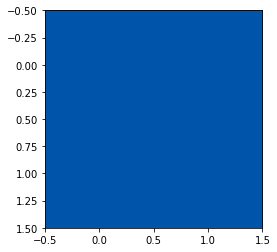

In [87]:
plt.imshow(np.dstack(([[0, 0], [0, 0]], [[1, 1], [1, 1]], [[2, 2], [2, 2]])) / 3)

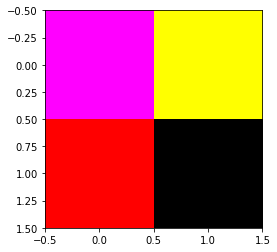

In [103]:
plt.imshow(np.dstack(([[2, 2], [2, 0]], [[0, 2], [0, 0]], [[2, 0], [0, 0]])) / 2)

In [49]:
dir(rast)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_get_rpcs',
 '_handle_crswkt',
 '_has_band',
 '_has_gcps_or_rpcs',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_rpcs',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_set_rpcs',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum

In [58]:
rast.descriptions

('B5', 'B6', 'B7')

In [107]:
xr.open_rasterio(return_path_dataarray().isel(year=1, mn=0, ty=1, ir=0).values.tolist())

'return_path_dataarray'  0.02914 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B3', 'B2', 'B1')
    AREA_OR_POINT:  Area

In [24]:
return_path_dataarray()

'return_path_dataarray'  0.06497 s



<xarray.DataArray (year: 37, mn: 4, ty: 2, ir: 2)>
array([[[[None, None],
         [None, None]],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_AMJ_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_AMJ_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_JAS_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_JAS_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_OND_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_OND_IR.tif']]],


       [[['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_hab_1985_JFM.tif',
...
       [[['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JFM.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JFM_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JFM.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JFM_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_AMJ_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JAS_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JAS_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_OND_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_OND_IR.tif']]]],
      dtype=object)
Coordinates:
  * year     (year) int64 1984 1985 1986 1987 1988 ... 2016 2017 2018 2019 2020
  * mn       (mn) <U3 'JFM' 'AMJ' 'JAS' 'OND'
  * ty       (ty) <U5 'hab' 'chern'
Dimensions without coordinates: ir
Attributes:
    description:  Paths to tif.

In [28]:
file_name = return_path_dataarray().isel(year=1, mn=0, ty=1, ir=0).values.tolist()

'return_path_dataarray'  0.05338 s



In [15]:
file_name_two = return_path_dataarray().isel(year=1, mn=0, ty=1).values.tolist()

'return_path_dataarray'  0.05737 s



In [29]:
file_name

'/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_chern_1985_JFM.tif'

In [32]:
xr.open_rasterio(return_path_dataarray().isel(year=1, mn=0, ty=1, ir=0).values.tolist())

'return_path_dataarray'  0.05158 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B3', 'B2', 'B1')
    AREA_OR_POINT:  Area

In [33]:
xr.open_rasterio(return_path_dataarray().isel(year=1, mn=0, ty=1, ir=1).values.tolist())

'return_path_dataarray'  0.05386 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B4', 'B5', 'B7')
    AREA_OR_POINT:  Area

In [36]:
xr.open_rasterio(return_path_dataarray().isel(year=35, mn=0, ty=1, ir=0).values.tolist())

Exception ignored in: <function CachingFileManager.__del__ at 0x7fddb846ff70>
Traceback (most recent call last):
  File "/home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xarray/backends/file_manager.py", line 238, in __del__
    ref_count = self._ref_counter.decrement(self._key)
AttributeError: 'CachingFileManager' object has no attribute '_ref_counter'


'return_path_dataarray'  0.06605 s



<xarray.DataArray (band: 4, y: 7361, x: 11776)>
[346732544 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.44 31.44 31.44 31.44
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    descriptions:   ('B1', 'B4', 'B3', 'B2')
    AREA_OR_POINT:  Area

In [37]:
xr.open_rasterio(return_path_dataarray().isel(year=35, mn=0, ty=1, ir=1).values.tolist())

'return_path_dataarray'  0.06305 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B5', 'B6', 'B7')
    AREA_OR_POINT:  Area

In [16]:
file_name_two

'/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_chern_1985_JFM_IR.tif'

In [12]:
xr.open_rasterio()

'return_path_dataarray'  0.06573 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B4', 'B5', 'B7')
    AREA_OR_POINT:  Area

In [5]:
x_da, y_da = xgb.return_x_y_da(
    take_esa_coords=True,
    use_mfd=True,
)

x/y values premade. Reusing them.
'return_x_y_da'  1.16983 s



In [6]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


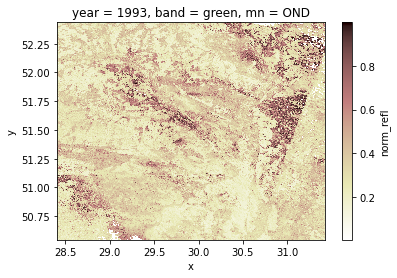

In [7]:
x_da.isel(year=1, mn=3, band=1).plot(cmap="pink_r")

In [8]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [9]:
y_da

<xarray.DataArray 'esa_cci' (year: 24, y: 681, x: 1086)>
dask.array<open_dataset-fae47f080d9dff4aa9e1ee5aa66bc516esa_cci, shape=(24, 681, 1086), dtype=uint8, chunksize=(1, 681, 1086), chunktype=numpy.ndarray>
Coordinates:
    band     int64 ...
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [10]:
y_da.isel(year=5).plot(cmap=cm)

NameError: name 'cm' is not defined

In [ ]:
x_da.isel(year=2, mn=3).plot(cmap=cm)

In [40]:
cm = copy.copy(plt.get_cmap("pink_r"))
cm.set_bad("gray")

In [94]:
x_tr, y_tr = xgb.return_xy_npa(
            x_da, y_da, year=range(0, 5)
        )

'return_xy_npa'  13.23970 s



In [36]:
x_tr.shape

(3697830, 12)

In [98]:
x_tr

array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
        0.285     ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
        0.2445    ],
       [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
        0.25583333],
       [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
        0.18666667]], dtype=float32)

In [38]:
y_tr.shape

(3697830,)

In [91]:
xgb.return_xy_npa(x_da.isel(year=range(0, 5)),
                  xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))),
                  year=range(0, 5))

'y_npa_to_xarray'  0.01133 s

'return_xy_npa'  19.08702 s



(array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
         0.285     ],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
         0.2445    ],
        [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
         0.25583333],
        [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
         0.18666667]], dtype=float32),
 array([  0, 100, 100, ...,  40,  40,   0], dtype=uint8))

'y_npa_to_xarray'  0.01072 s



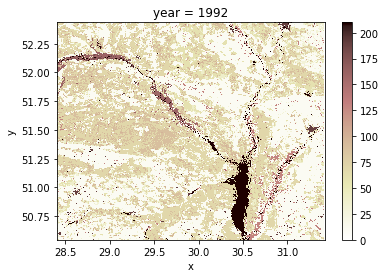

In [96]:
xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))).isel(year=0).plot(cmap=cm)

'x_npa_to_xarray'  0.15835 s



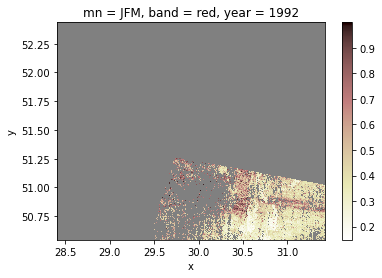

In [105]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=0, mn=0, band=0).plot(cmap=cm)

'x_npa_to_xarray'  0.22868 s



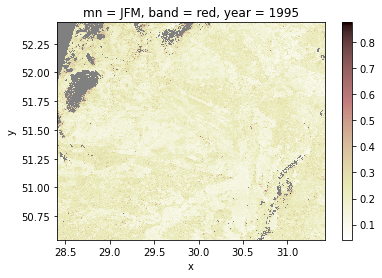

In [106]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=3, mn=0, band=0).plot(cmap=cm)

In [103]:
len(x_da.y.values)

681

Text(0, 0.5, 'count')

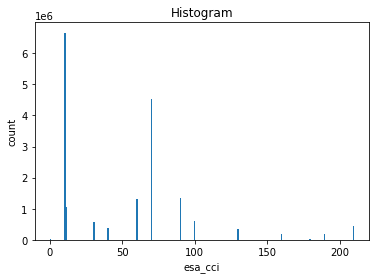

In [17]:
y_da.plot.hist(bins=211)
plt.ylabel('count')

In [107]:
np.unique(y_da.values.ravel())

array([  0,  10,  11,  30,  40,  60,  61,  70,  80,  90, 100, 110, 130,
       150, 160, 180, 190, 200, 201, 210], dtype=uint8)

In [112]:
[i for i in range(len(np.unique(y_da.values.ravel())))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [126]:
def make_esa_map_d():
    a= [0, 10, 11, 30, 40, 60, 61, 70, 80, 90, 100, 
        110, 130, 150, 160, 180, 190, 200, 201, 210]     
    b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    forw_d = {}
    rev_d = {}
    for i in range(len(a)):
        forw_d[a[i]] = b[i]
        rev_d[b[i]] = a[i]
    return forw_d, rev_d

FORW_D, REV_D = make_esa_map_d()

def _compress_esa(x):
    return FORW_D[x]

def _decompress_esa(x):
    return REV_D[x]

compress_esa = np.vectorize(_compress_esa)
decompress_esa = np.vectorize(_decompress_esa)


In [129]:
assert(np.all(y_da.values == decompress_esa(compress_esa(y_da.values))))

In [ ]:
def _decompress_esa(x):
    return REV_D[x]

In [119]:
for_d

{0: 0,
 10: 1,
 11: 2,
 30: 3,
 40: 4,
 60: 5,
 61: 6,
 70: 7,
 80: 8,
 90: 9,
 100: 10,
 110: 11,
 130: 12,
 150: 13,
 160: 14,
 180: 15,
 190: 16,
 200: 17,
 201: 18,
 210: 19}

In [120]:
rev_d

{0: 0,
 1: 10,
 2: 11,
 3: 30,
 4: 40,
 5: 60,
 6: 61,
 7: 70,
 8: 80,
 9: 90,
 10: 100,
 11: 110,
 12: 130,
 13: 150,
 14: 160,
 15: 180,
 16: 190,
 17: 200,
 18: 201,
 19: 210}

In [18]:
x_da.plot.hist(bins=100)
cfd = {
    "start_year_i": 0,
    "mid_year_i": 19,
    "end_year_i": 24,
    "take_esa_coords": True,
}
plt.ylabel("Count")

IndentationError: unexpected indent (<ipython-input-18-2d1ab74624c8>, line 2)

In [28]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [29]:
x_all, y_all = xgb.return_xy_npa(
                x_da, y_da, 
                year=range(cfd["start_year_i"], 
                           cfd["end_year_i"]))

'return_xy_npa'  64.89961 s



In [37]:
x_da.isel(year=0, mn=0, band=1).values.shape

(681, 1086)

In [35]:
 y_da.isel(year=0).values.shape

(681, 1086)

In [ ]:
x_val.shape

In [ ]:
y_val = y_da.isel(year=range(0, 2)) #.values.ravel()
y_val.shape

In [51]:
x_da.isel(year=range(0, 9), mn=0, band=0).shape

(681, 1086, 9)

In [52]:
y_da.isel(year=range(0, 9)).values.shape

(9, 681, 1086)

In [4]:
xr.open_dataset("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/nc_hab/hab_JFM.nc")

<xarray.Dataset>
Dimensions:    (band: 3, mn: 1, x: 6360, y: 3313, year: 37)
Coordinates:
  * y          (y) float64 52.46 52.46 52.46 52.46 ... 51.57 51.57 51.57 51.57
  * x          (x) float64 26.89 26.89 26.89 26.89 26.89 ... 28.6 28.6 28.6 28.6
  * band       (band) object 'red' 'green' 'blue'
  * year       (year) int64 1984 1985 1986 1987 1988 ... 2017 2018 2019 2020
  * mn         (mn) object 'JFM'
Data variables:
    norm_refl  (y, x, band, year, mn) float32 ...

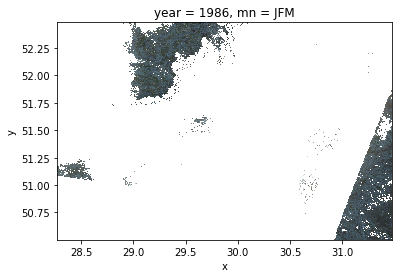

In [12]:
xr.open_dataset("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc/chern_JFM_year_1986.nc").norm_refl.isel(year=0, mn=0).plot.imshow()

In [5]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc

chern_JFM_year_1984.nc  hab_JFM_year_1989.nc  hab_JFM_year_2006.nc
chern_JFM_year_1985.nc  hab_JFM_year_1990.nc  hab_JFM_year_2007.nc
chern_JFM_year_1986.nc  hab_JFM_year_1991.nc  hab_JFM_year_2008.nc
chern_JFM_year_1987.nc  hab_JFM_year_1992.nc  hab_JFM_year_2009.nc
chern_JFM_year_1988.nc  hab_JFM_year_1993.nc  hab_JFM_year_2010.nc
chern_JFM_year_1989.nc  hab_JFM_year_1994.nc  hab_JFM_year_2011.nc
chern_JFM_year_1990.nc  hab_JFM_year_1995.nc  hab_JFM_year_2012.nc
chern_JFM_year_1991.nc  hab_JFM_year_1996.nc  hab_JFM_year_2013.nc
chern_JFM_year_1992.nc  hab_JFM_year_1997.nc  hab_JFM_year_2014.nc
chern_JFM_year_1993.nc  hab_JFM_year_1998.nc  hab_JFM_year_2015.nc
chern_JFM_year_1994.nc  hab_JFM_year_1999.nc  hab_JFM_year_2016.nc
chern_JFM_year_1995.nc  hab_JFM_year_2000.nc  hab_JFM_year_2017.nc
hab_JFM_year_1984.nc    hab_JFM_year_2001.nc  hab_JFM_year_2018.nc
hab_JFM_year_1985.nc    hab_JFM_year_2002.nc  hab_JFM_year_2019.nc
hab_JFM_year_1986.nc    hab_JFM_year_2003.nc  hab_JFM_year_202

In [ ]:
xr.open()